In [113]:
import pandas as pd


In [114]:
df =  pd.read_csv('data.csv')

In [116]:
df.head()

,Technical Knowledge,Personal Traits,Social Characteristics,Motivating Factors,Age,City
0,Well Trained,Inhuman Psyche,Anti-social,Need to control others,66,Hetauda
1,Goal-oriented,Passionate,Mass-destruction,Thrill-seeking,37,Kathmandu
2,Well-organized,Chaotic state of mind,Brain-washed,Manipulate Others,60,Butwal
3,Well-trained,Insensitive,Inferiority Complex,Political Beliefs,18,Hetauda
4,Well-organized,Chaotic state of mind,Brain-washed,Manipulate Others,17,Lalitpur


Text(0.5, 1.0, 'Personal Traits')

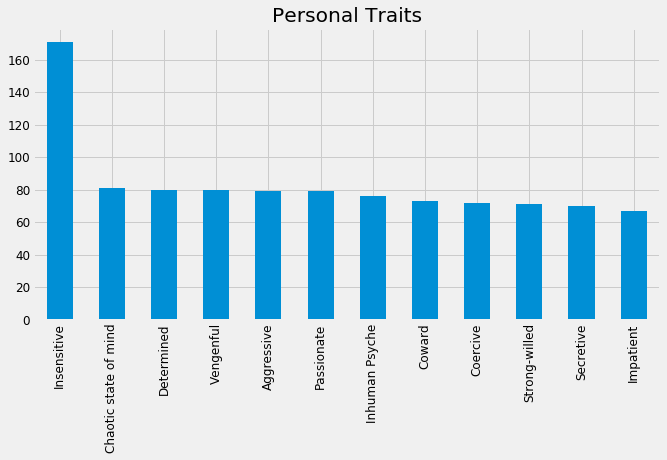

In [102]:
ax=df['Personal Traits'].value_counts().plot.bar(
    figsize=(10,5),
    fontsize=12)
ax.set_title("Personal Traits")

Text(0.5, 1.0, 'Technical Knowledge')

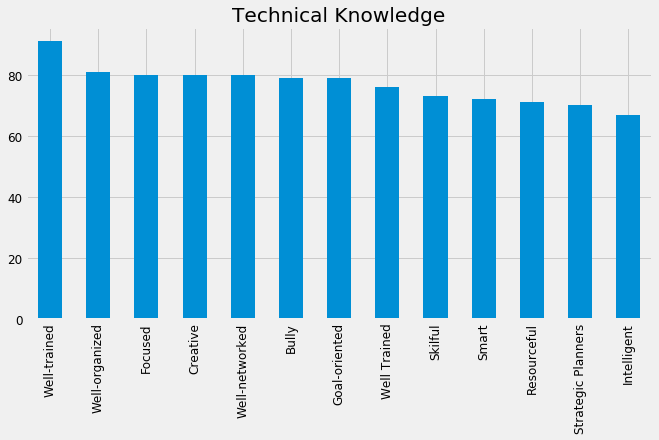

In [117]:
ax=df['Technical Knowledge'].value_counts().plot.bar(
    figsize=(10,5),
    fontsize=12)
ax.set_title("Technical Knowledge")

Text(0.5, 1.0, 'Social Characteristics')

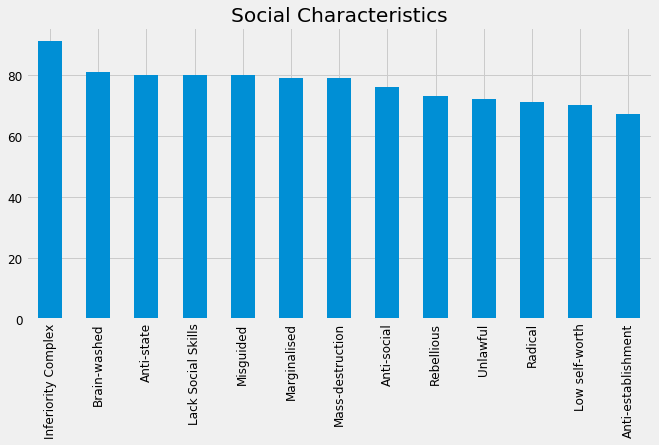

In [96]:
ax=df['Social Characteristics'].value_counts().plot.bar(
    figsize=(10,5),
    fontsize=12)
ax.set_title("Social Characteristics")

Text(0.5, 1.0, 'Motivating Factors')

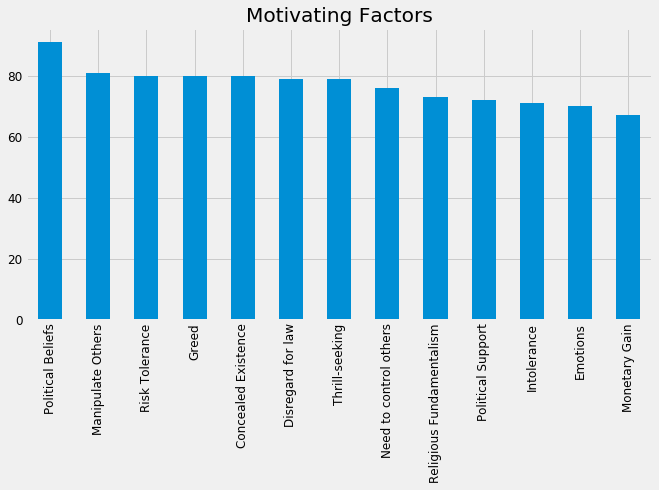

In [97]:
ax=df['Motivating Factors'].value_counts().plot.bar(
    figsize=(10,5),
    fontsize=12)
ax.set_title("Motivating Factors")

Text(0.5, 1.0, 'City')

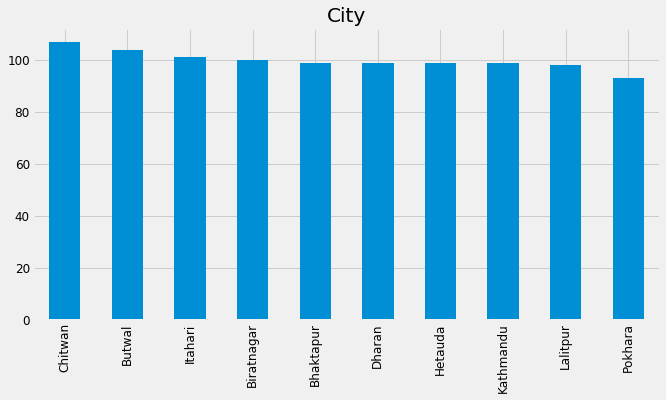

In [98]:
ax=df['City'].value_counts().plot.bar(
    figsize=(10,5),
    fontsize=12)
ax.set_title("City")

In [123]:
from sklearn.preprocessing import LabelEncoder

for i in df.columns:
    label_encoder = LabelEncoder()
    df[i] = label_encoder.fit_transform(df[i])
    

In [124]:
df

,Technical Knowledge,Personal Traits,Social Characteristics,Motivating Factors,Age,City
0,9,6,1,7,51,5
1,3,8,8,12,22,7
2,11,1,3,5,45,2
3,12,7,4,8,3,5
4,11,1,3,5,2,8
5,2,4,5,3,22,9
6,6,3,11,10,51,1
7,11,1,3,5,6,6
8,10,7,9,11,7,4
9,9,6,1,7,13,9


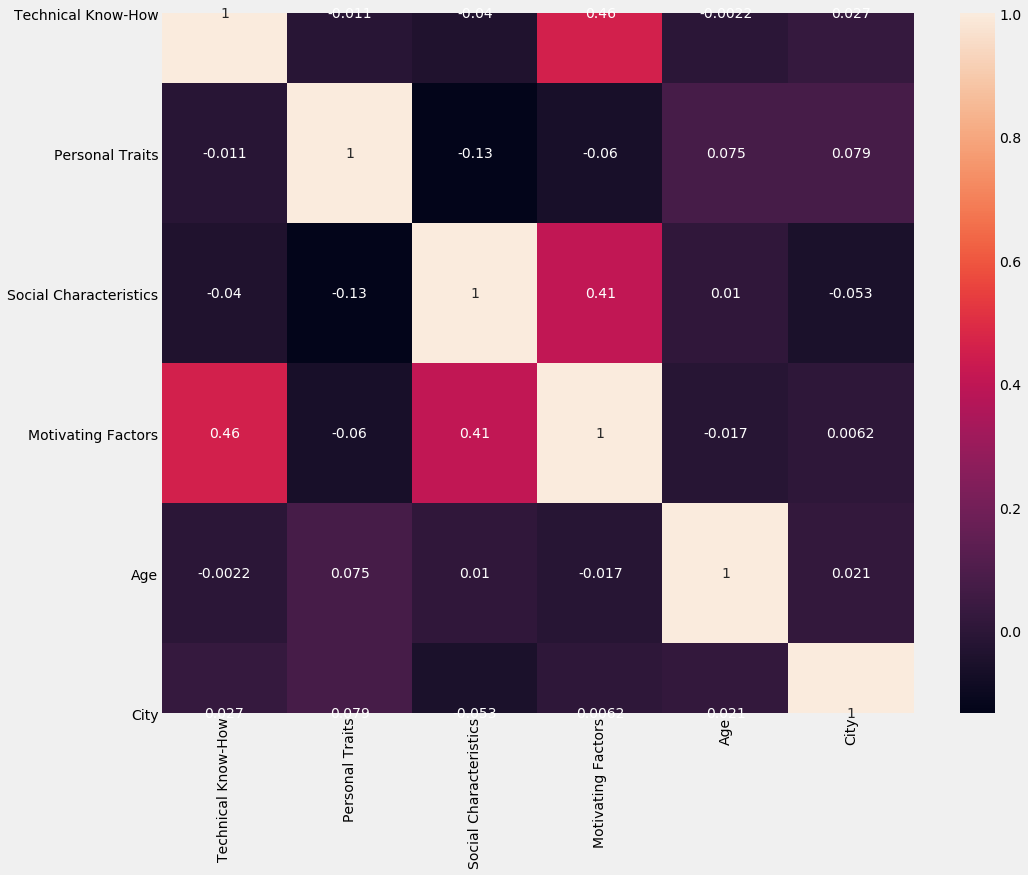

In [105]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Correlations between Data

plt.rcParams['figure.figsize'] = (15, 12)
sns.heatmap(df.corr(), annot=True)
plt.show()

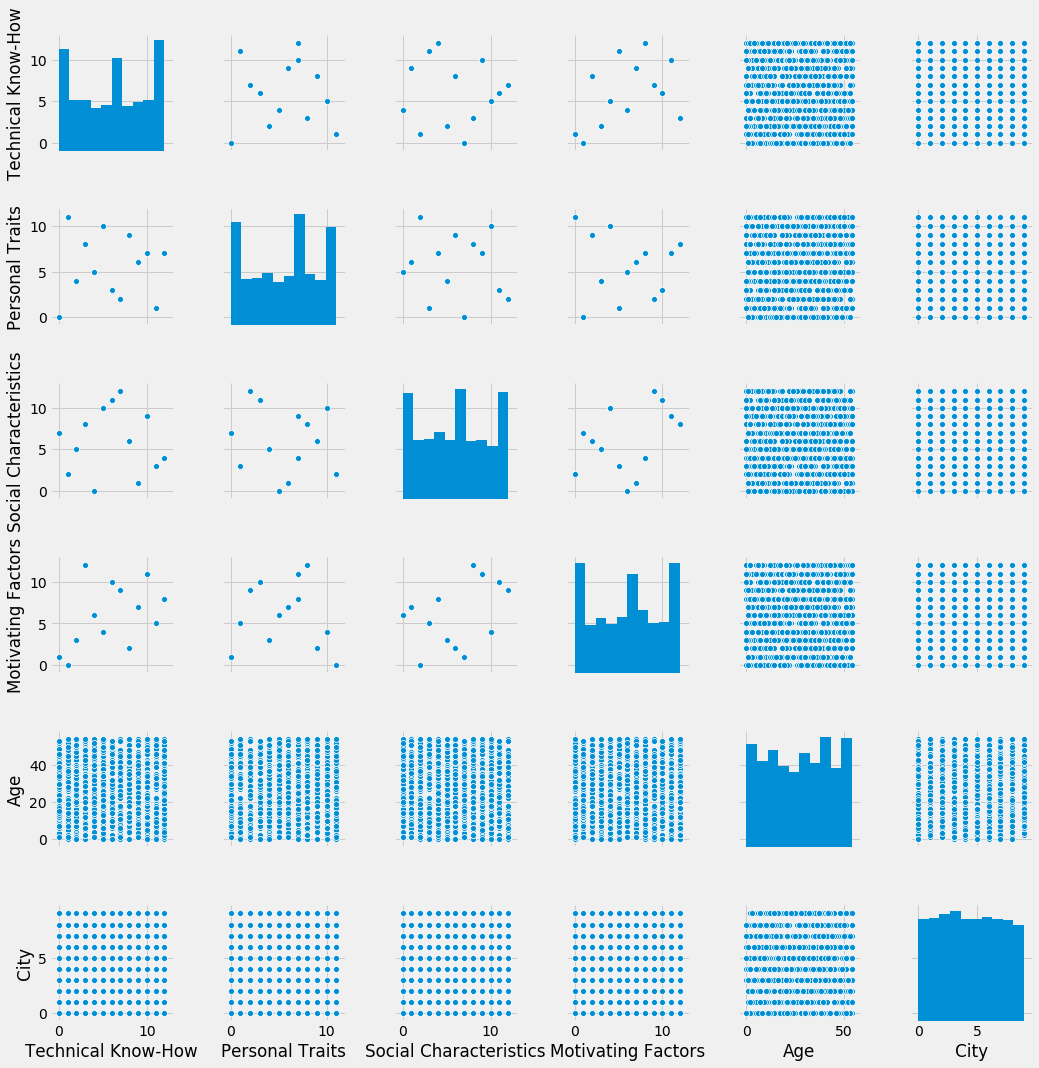

In [106]:
#sns.set(style='tricks') #Give better visualization
sns.pairplot(df,kind = "scatter",palette = "husl")
plt.show()

In [107]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df.values)
    sse.append(kmeans.inertia_)

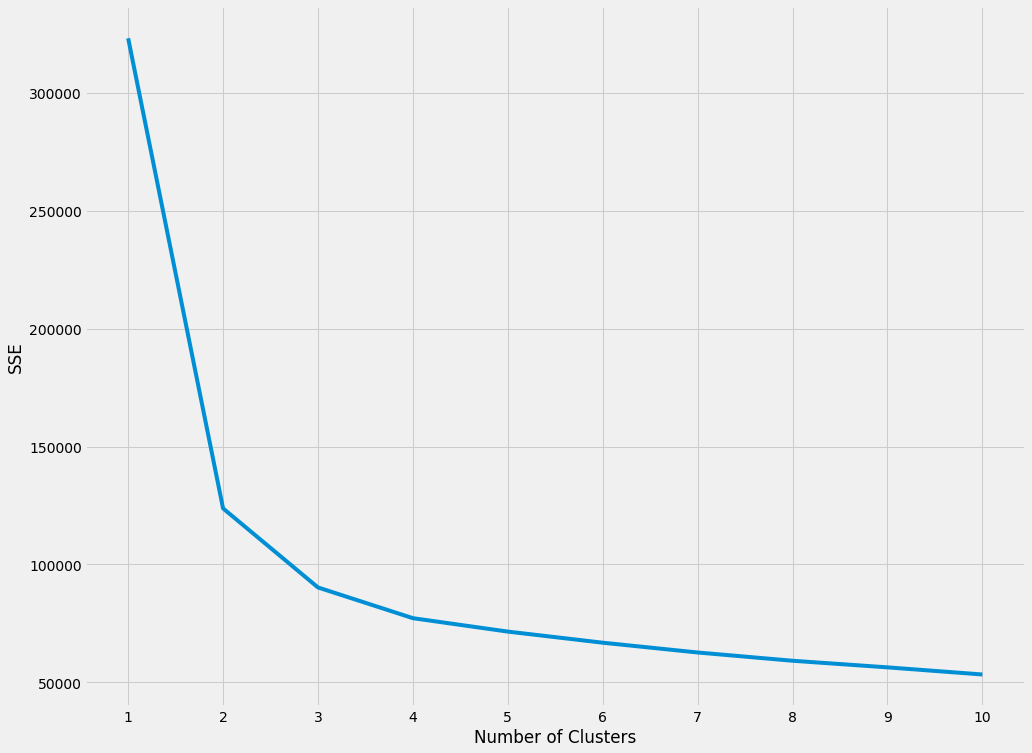

In [108]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [125]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmean = kmeans.fit(df.values)

In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X = pca.fit_transform(df.values) 
X = pd.DataFrame(X) 
X.columns = ['P1', 'P2'] 
  
X.head(2)

,P1,P2
0,-23.763917,-0.351018
1,5.193154,-3.058090


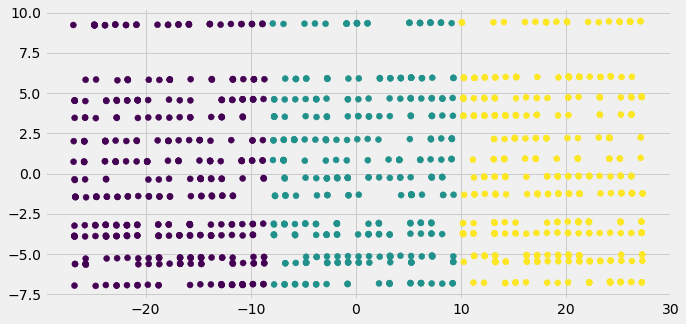

In [143]:
plt.figure(figsize=(10,5))
plt.scatter(X['P1'], X['P2'], c=kmean.labels_)
plt.show()